In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import dask
from dask.distributed import Client
import dask.dataframe as dd

In [2]:
os.getcwd()
sales = "E:\\TDI_Capstone_Data_Repo\\Sales\\*.csv"

In [3]:
# parse dates columns
date_cols = ['created_at','updated_at','sold_at', 'deleted_at']

In [4]:
# define the Dask DataFrames for Sales, Lazy Compute
sales_df = dd.read_csv(sales, sep='\t', encoding = "utf-8", parse_dates = date_cols, blocksize = '64MB')
#sales_df = dd.read_csv(sale1_v2, sep='\t', encoding = "utf-8", parse_dates = date_cols, blocksize = '64MB')

# Shape of each Sales File
sales_shape = sales_df.shape

In [5]:
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:59439 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 7.60 GiB


In [14]:
client.restart()

In [ ]:
client.shutdown()

In [25]:
dask.compute(sales_shape)

((193940744, 13),)

In [26]:
sales_df.head()

,global_id,created_at,updated_at,external_id,deleted_at,type,mme_id,user_id,area_id,sold_by_user_id,sold_at,price_total,status
0,WAJ412252.SA1,2018-01-31 22:34:37,2018-01-31 22:34:37,NaN,2018-02-01 06:35:04,wholesale,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.AR11,WAWA1.USQ7,2018-01-31 16:00:00,205.2,sale
1,WAJ412252.SA2,2018-01-31 22:35:06,2018-01-31 22:35:06,NaN,2018-02-01 06:35:30,wholesale,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.AR11,WAWA1.USQ7,2018-01-31 16:00:00,205.2,sale
2,WAJ412252.SA3,2018-01-31 22:35:32,2018-01-31 22:35:32,NaN,2018-02-01 06:37:22,wholesale,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.AR11,WAWA1.USQ7,2018-01-31 16:00:00,205.2,sale
3,WAJ412252.SA4,2018-01-31 22:37:23,2018-01-31 22:37:23,NaN,2018-02-01 08:11:08,wholesale,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.AR11,WAWA1.USQ7,2018-01-31 16:00:00,205.2,sale
4,WAJ412252.SA5,2018-01-31 22:58:26,2018-01-31 22:58:26,NaN,2018-02-01 08:41:33,wholesale,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.AR11,WAWA1.USQ7,2018-01-31 16:00:00,1701.0,sale


In [27]:
sales_df.columns

Index(['global_id', 'created_at', 'updated_at', 'external_id', 'deleted_at',
       'type', 'mme_id', 'user_id', 'area_id', 'sold_by_user_id', 'sold_at',
       'price_total', 'status'],
      dtype='object')

#### What are the Types of Sales from Available Sales Data?
#### What are the Sale Status Types?

In [28]:
dask.compute(sales_df.type.unique())

(0              wholesale
 1    retail_recreational
 2         retail_medical
 3                    NaN
 Name: type, dtype: object,)

In [30]:
# Count Each Type That Occured
sale_type_counts = dask.compute(sales_df.type.value_counts())

In [31]:
print(sale_type_counts[0])

retail_recreational    108552573
retail_medical          84154898
wholesale                1231294
Name: type, dtype: int64


In [33]:
status_type_counts = dask.compute(sales_df.status.value_counts())

In [34]:
print(status_type_counts[0])

sale      193412874
return       527812
void             58
Name: status, dtype: int64


In [38]:
total_sales = 193940744
print(total_sales)
print(sum(sale_type_counts[0]))
print("{:.5f}% NaN Values".format(((total_sales - sum(sale_type_counts[0]))/total_sales)*100))

193940744
193938765
0.00102% NaN Values


In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')

In [39]:
df = sale_type_counts[0].to_frame()
df.rename(columns={"type": "Counts"})
df

,type
retail_recreational,108552573
retail_medical,84154898
wholesale,1231294


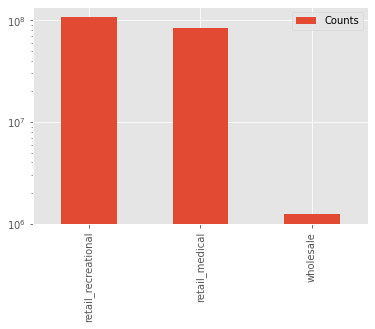

In [40]:
fig, ax = plt.subplots()
df.plot(kind='bar', ax=ax)
ax.set_yscale('log')
ax.legend(["Counts"])

In [41]:
df['fraction-sales-%'] = (df['type'] / total_sales) * 100

In [42]:
df

,type,fraction-sales-%
retail_recreational,108552573,55.972031
retail_medical,84154898,43.392067
wholesale,1231294,0.634882


In [45]:
client.restart()

distributed.nanny - WARNING - Worker process still alive after 1 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 1 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 1 seconds, killing
distributed.nanny - WARNING - Worker process still alive after 1 seconds, killing


Client Scheduler: tcp://127.0.0.1:60232 Dashboard: http://127.0.0.1:60231/status,Cluster Workers: 4 Cores: 8 Memory: 7.60 GiB


#### Sum price_total Across Type

In [46]:
sales_sales_prcTot = dask.compute(sales_df.groupby(['type'])['price_total'].sum())

In [47]:
print(sales_sales_prcTot[0])

type
retail_medical         1.189943e+09
retail_recreational    3.039402e+09
wholesale              4.837174e+09
Name: price_total, dtype: float64


In [34]:
dask.compute(sales1_df.status.value_counts())

(sale      93481660
 return      459084
 Name: status, dtype: int64,)

In [48]:
sales_typeStatus = dask.compute(sales_df.groupby(['type', 'status'])['price_total'].sum())

In [36]:
print(sales_typeStatus[0])

(type                 status
 retail_medical       return   -9.729017e+05
                      sale      1.086400e+09
 retail_recreational  sale      5.311464e+08
 wholesale            sale      1.660266e+09
 retail_recreational  return    3.876908e+05
                      void      1.366980e+03
 Name: price_total, dtype: float64,)

In [57]:
sales_df.head()

,global_id,created_at,updated_at,external_id,deleted_at,type,mme_id,user_id,area_id,sold_by_user_id,sold_at,price_total,status,date
0,WAJ412252.SA1,2018-01-31 22:34:37,2018-01-31 22:34:37,NaN,2018-02-01 06:35:04,wholesale,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.AR11,WAWA1.USQ7,2018-01-31 16:00:00,205.2,sale,2018-01-31
1,WAJ412252.SA2,2018-01-31 22:35:06,2018-01-31 22:35:06,NaN,2018-02-01 06:35:30,wholesale,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.AR11,WAWA1.USQ7,2018-01-31 16:00:00,205.2,sale,2018-01-31
2,WAJ412252.SA3,2018-01-31 22:35:32,2018-01-31 22:35:32,NaN,2018-02-01 06:37:22,wholesale,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.AR11,WAWA1.USQ7,2018-01-31 16:00:00,205.2,sale,2018-01-31
3,WAJ412252.SA4,2018-01-31 22:37:23,2018-01-31 22:37:23,NaN,2018-02-01 08:11:08,wholesale,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.AR11,WAWA1.USQ7,2018-01-31 16:00:00,205.2,sale,2018-01-31
4,WAJ412252.SA5,2018-01-31 22:58:26,2018-01-31 22:58:26,NaN,2018-02-01 08:41:33,wholesale,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.AR11,WAWA1.USQ7,2018-01-31 16:00:00,1701.0,sale,2018-01-31


#### Looking at Daily Sales
- Gives the summed price total in each category for each day available in dataset
- Group By:
    - `sold_at`: date that item was sold
    - `type`: type of sale (wholesale, recreational, medical)
    - `status`: sale, return, or void

In [60]:
tmp = dask.compute(sales_df.groupby(['sold_at', 'type', 'status'])['price_total'].sum())
tmp1 = tmp[0].to_frame()
tmp1

In [71]:
tmp2=tmp1.reset_index(level=[0,1])

In [67]:
status_list = np.array(tmp2.index)

In [68]:
status_list

array(['sale', 'sale', 'sale', ..., 'sale', 'return', 'sale'],
      dtype=object)

In [72]:
tmp2['status'] = status_list
tmp2['date'] = tmp2.sold_at.dt.date
tmp2 = tmp2.set_index(np.arange(0,len(status_list)))

In [74]:
tmp2.to_csv('third_pass_dailySales.csv')

In [75]:
tmp2

,sold_at,type,price_total,status,date
0,1900-01-01 00:00:00,retail_recreational,3801.20,sale,1900-01-01
1,2017-11-05 16:00:00,retail_medical,474.00,sale,2017-11-05
2,2017-11-06 16:00:00,retail_medical,0.00,sale,2017-11-06
3,2017-11-07 16:00:00,retail_medical,129.84,sale,2017-11-07
4,2017-11-08 16:00:00,retail_medical,34.00,sale,2017-11-08
...,...,...,...,...,...
6314,2021-01-05 16:00:00,wholesale,632660.56,return,2021-01-05
6315,2021-01-05 16:00:00,wholesale,5488121.70,sale,2021-01-05
6316,2021-01-06 16:00:00,retail_medical,878.29,sale,2021-01-06
6317,2021-01-06 16:00:00,retail_recreational,370.06,return,2021-01-06


In [76]:
yarg = tmp2[(tmp2['date'] > datetime.date(2000, 1, 1)) & tmp2['price_total'] > 0]

In [77]:
yarg

,sold_at,type,price_total,status,date
1,2017-11-05 16:00:00,retail_medical,474.00,sale,2017-11-05
3,2017-11-07 16:00:00,retail_medical,129.84,sale,2017-11-07
4,2017-11-08 16:00:00,retail_medical,34.00,sale,2017-11-08
5,2017-11-09 16:00:00,retail_medical,127.84,sale,2017-11-09
6,2017-11-10 16:00:00,retail_medical,16.32,sale,2017-11-10
...,...,...,...,...,...
6314,2021-01-05 16:00:00,wholesale,632660.56,return,2021-01-05
6315,2021-01-05 16:00:00,wholesale,5488121.70,sale,2021-01-05
6316,2021-01-06 16:00:00,retail_medical,878.29,sale,2021-01-06
6317,2021-01-06 16:00:00,retail_recreational,370.06,return,2021-01-06


In [105]:
n = np.random.randint(low=0,high=len(status_list))
yarg[yarg['date'] == yarg['date'][n]]

,sold_at,type,price_total,status,date
5615,2020-09-11 17:00:00,retail_medical,-125.78,return,2020-09-11
5616,2020-09-11 17:00:00,retail_medical,49386.56,sale,2020-09-11
5617,2020-09-11 17:00:00,retail_recreational,-6949.05,return,2020-09-11
5618,2020-09-11 17:00:00,retail_recreational,4118746.95,sale,2020-09-11
5619,2020-09-11 17:00:00,wholesale,301619.39,return,2020-09-11
5620,2020-09-11 17:00:00,wholesale,1021514.16,sale,2020-09-11


In [109]:
yarg = yarg.sort_values(by='date')

In [124]:
retail_rec_sale  = yarg[(yarg['date'] >= datetime.date(2017, 1, 1)) & 
                        (yarg['type'] == 'retail_recreational') & 
                        (yarg['status'] == 'sale')]
retail_med_sale  = yarg[(yarg['date'] >= datetime.date(2017, 1, 1)) & 
                        (yarg['type'] == 'retail_medical') & 
                        (yarg['status'] == 'sale')]
wholesale_sale   = yarg[(yarg['date'] >= datetime.date(2017, 1, 1)) & 
                        (yarg['type'] == 'wholesale') & 
                        (yarg['status'] == 'sale')]

In [125]:
retail_rec_sale

,sold_at,type,price_total,status,date
3587,2017-11-05 16:00:00,retail_recreational,2295.99,sale,2017-11-05
3589,2017-11-06 16:00:00,retail_recreational,2292.08,sale,2017-11-06
3590,2017-11-07 16:00:00,retail_recreational,2085.60,sale,2017-11-07
3591,2017-11-08 16:00:00,retail_recreational,2189.32,sale,2017-11-08
3593,2017-11-09 16:00:00,retail_recreational,3533.92,sale,2017-11-09
...,...,...,...,...,...
6294,2021-01-02 16:00:00,retail_recreational,3335601.84,sale,2021-01-02
6300,2021-01-03 16:00:00,retail_recreational,3932417.51,sale,2021-01-03
6305,2021-01-04 16:00:00,retail_recreational,3666773.13,sale,2021-01-04
6313,2021-01-05 16:00:00,retail_recreational,3281623.69,sale,2021-01-05


In [205]:
print("RETAIL_RECREATIONAL")
print(retail_rec_sale.describe())

print("RETAIL_MEDICAL")
print(retail_med_sale.describe())

print("WHOLESALE")
print(wholesale_sale.describe())

RETAIL_RECREATIONAL
        price_total
count  1.117000e+03
mean   2.725141e+06
std    1.316134e+06
min    6.776000e+01
25%    2.149808e+06
50%    2.842117e+06
75%    3.585838e+06
max    7.006397e+06
RETAIL_MEDICAL
        price_total
count  1.141000e+03
mean   1.043830e+06
std    4.946976e+06
min    3.400000e+00
25%    4.403284e+04
50%    6.591930e+04
75%    4.308049e+05
max    6.834845e+07
WHOLESALE
        price_total
count  1.070000e+03
mean   4.133398e+06
std    9.994379e+06
min    1.000000e+02
25%    9.518775e+05
50%    3.816367e+06
75%    4.778003e+06
max    2.087939e+08


(18017.0, 18046.0)

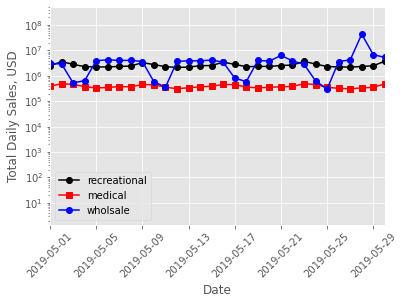

In [206]:
plt.plot(retail_rec_sale['date'], retail_rec_sale['price_total'], 'ko-', label='recreational')
plt.plot(retail_med_sale['date'], retail_med_sale['price_total'], 'rs-', label='medical')
plt.plot(wholesale_sale['date'], wholesale_sale['price_total'], 'bo-', label='wholsale')
plt.xticks(rotation = 45)
plt.legend()
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Total Daily Sales, USD')
plt.xlim(datetime.date(2019,5,1), datetime.date(2019,5,30))

#### Determining Number of Daily Sales

In [184]:
num_transactions_byDay_byType_sales = dask.compute(sales_df.groupby(['sold_at', 'type', 'status'])['status'].value_counts())

In [162]:
num_transactions_byDay_byType_sales[0]

sold_at              type                 status             
1900-01-01 00:00:00  retail_recreational  retail_recreational        10
2017-11-05 16:00:00  retail_medical       retail_medical         297194
2017-11-06 16:00:00  retail_medical       retail_medical         253679
2017-11-07 16:00:00  retail_medical       retail_medical         204563
2017-11-08 16:00:00  retail_medical       retail_medical         213429
                                                                  ...  
2021-01-05 16:00:00  retail_medical       retail_medical            709
                     retail_recreational  retail_recreational     97121
                     wholesale            wholesale                1616
2021-01-06 16:00:00  retail_medical       retail_medical             21
                     retail_recreational  retail_recreational      3680
Name: status, Length: 3450, dtype: int64

In [185]:
daily_transactions = num_transactions_byDay_byType_sales[0].to_frame()

In [186]:
daily_transactions

status
sold_at             type                status status                     
1900-01-01 00:00:00 retail_recreational sale   retail_recreational      10
2017-11-05 16:00:00 retail_medical      sale   retail_medical       297194
2017-11-06 16:00:00 retail_medical      sale   retail_medical       253679
2017-11-07 16:00:00 retail_medical      sale   retail_medical       204563
2017-11-08 16:00:00 retail_medical      sale   retail_medical       213429
...                                                                    ...
2021-01-05 16:00:00 wholesale           return wholesale               182
                                        sale   wholesale              1434
2021-01-06 16:00:00 retail_medical      sale   retail_medical           21
                    retail_recreational return retail_recreational      16
                                        sale   retail_recreational    3664

[6319 rows x 1 columns]

In [187]:
dailyTrans=daily_transactions.reset_index(level=[0,1])

In [188]:
dailyTrans

sold_at                 type  status
status status                                                              
sale   retail_recreational 1900-01-01 00:00:00  retail_recreational      10
       retail_medical      2017-11-05 16:00:00       retail_medical  297194
       retail_medical      2017-11-06 16:00:00       retail_medical  253679
       retail_medical      2017-11-07 16:00:00       retail_medical  204563
       retail_medical      2017-11-08 16:00:00       retail_medical  213429
...                                        ...                  ...     ...
return wholesale           2021-01-05 16:00:00            wholesale     182
sale   wholesale           2021-01-05 16:00:00            wholesale    1434
       retail_medical      2021-01-06 16:00:00       retail_medical      21
return retail_recreational 2021-01-06 16:00:00  retail_recreational      16
sale   retail_recreational 2021-01-06 16:00:00  retail_recreational    3664

[6319 rows x 3 columns]

In [182]:
status_list1 = np.array(dailyTrans.index)
dailyTrans['status'] = status_list1
dailyTrans['date'] = dailyTrans.sold_at.dt.date
dailyTrans = dailyTrans.set_index(np.arange(0,len(status_list1)))

In [183]:
dailyTrans

,sold_at,type,status,date
0,1900-01-01 00:00:00,retail_recreational,retail_recreational,1900-01-01
1,2017-11-05 16:00:00,retail_medical,retail_medical,2017-11-05
2,2017-11-06 16:00:00,retail_medical,retail_medical,2017-11-06
3,2017-11-07 16:00:00,retail_medical,retail_medical,2017-11-07
4,2017-11-08 16:00:00,retail_medical,retail_medical,2017-11-08
...,...,...,...,...
3445,2021-01-05 16:00:00,retail_medical,retail_medical,2021-01-05
3446,2021-01-05 16:00:00,retail_recreational,retail_recreational,2021-01-05
3447,2021-01-05 16:00:00,wholesale,wholesale,2021-01-05
3448,2021-01-06 16:00:00,retail_medical,retail_medical,2021-01-06


In [192]:
date_cols_labResults = ['created_at',
                        'deleted_at',
                        'updated_at',
                        'tested_at',
                        'received_at']
col_type_fixes = {'external_id': 'object',
                  'parent_lab_result_id': 'object',
                  'terpenoid_status': 'object',
                  'og_parent_lab_result_id': 'object',
                  'copied_from_lab_id': 'object'}

labRes_path = "E:/TDI_Capstone_Data_Repo/LabResults/LabResults_0-utf8.csv"

In [193]:
labResults_df = dd.read_csv(labRes_path, sep='\t', encoding = "utf-8", parse_dates = date_cols_labResults, dtype = col_type_fixes, blocksize = '64MB')

In [194]:
dask.compute(labResults_df.shape)

((1993093, 185),)

In [195]:
labResults_df.head()

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,...,pesticide_spirotetramat_ppm,pesticide_spiroxamine_ppm,pesticide_tebuconazole_ppm,pesticide_thiacloprid_ppm,foreign_matter_stems,foreign_matter_seeds,test_for_terpenes,global_for_inventory_id,high_thc_flag,high_cbd_flag
0,NaN,2018-01-31 22:34:19,WAWA1.MMCY,WAWA1.US29D,5275985106676286,NaT,WAJ412964.INCP,2018-01-31 22:34:19,not tested,completed,...,0.0,0.0,0.0,0.0,False,False,False,NaN,False,False
1,WAJ412964.LR2,2018-01-31 22:36:20,WAWA1.MMCY,WAWA1.US29D,4129640000001061,NaT,WAJ412964.ING1,2018-01-31 22:36:20,passed,completed,...,0.0,0.0,0.0,0.0,False,False,False,WAJ412964.ING1,False,False
2,NaN,2018-01-31 22:39:17,WAWA1.MMCY,WAWA1.US29D,5275985106676286,NaT,WAJ412964.INCP,2018-01-31 22:39:17,not tested,completed,...,0.0,0.0,0.0,0.0,False,False,False,NaN,False,False
3,NaN,2018-01-31 22:44:04,WAWA1.MMCY,WAWA1.US29D,5275985106676286,NaT,WAJ412964.INCP,2018-01-31 22:44:04,not tested,completed,...,0.0,0.0,0.0,0.0,False,False,False,NaN,False,False
4,NaN,2018-01-31 22:49:01,WAWA1.MMCY,WAWA1.US29D,5275985106676286,NaT,WAJ412964.INCP,2018-01-31 22:49:01,not tested,completed,...,0.0,0.0,0.0,0.0,False,False,False,NaN,False,False


In [11]:
col_type_fixes = {'external_id': 'object'}
saleitems_date_cols = ['created_at','updated_at','sold_at']
saleitems_dir = "E:/TDI_Capstone_Data_Repo/Saleitems/*csv"
saleitems_df = dd.read_csv(saleitems_dir, sep='\t', encoding = "utf-8", parse_dates = saleitems_date_cols, dtype = col_type_fixes, blocksize = '64MB')

In [12]:
saleitems_df.head()

,global_id,created_at,updated_at,mme_id,user_id,inventory_id,external_id,sale_id,batch_id,use_by_date,description,sold_at,qty,uom,unit_price,price_total,name
0,WAJ412252.SI1,2018-01-31 22:34:37,2018-01-31 22:34:37,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.IN8K,NaN,WAJ412252.SA1,WAJ412252.BA1DA,1900-01-01,NaN,2018-01-31 16:00:00,12.0,ea,0.0,108.0,F0006 ZOOTS Caramel Espresso Brownie 6-Pk
1,WAJ412252.SI2,2018-01-31 22:34:37,2018-01-31 22:34:37,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.INA5,NaN,WAJ412252.SA1,WAJ412252.BA1EV,1900-01-01,NaN,2018-01-31 16:00:00,12.0,ea,0.0,97.2,F0076 ZOOTS Caramel Rocks 20-Pk
2,WAJ412252.SI3,2018-01-31 22:35:07,2018-01-31 22:35:07,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.IN8K,NaN,WAJ412252.SA2,WAJ412252.BA1DA,1900-01-01,NaN,2018-01-31 16:00:00,12.0,ea,0.0,108.0,F0006 ZOOTS Caramel Espresso Brownie 6-Pk
3,WAJ412252.SI4,2018-01-31 22:35:07,2018-01-31 22:35:07,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.INA5,NaN,WAJ412252.SA2,WAJ412252.BA1EV,1900-01-01,NaN,2018-01-31 16:00:00,12.0,ea,0.0,97.2,F0076 ZOOTS Caramel Rocks 20-Pk
4,WAJ412252.SI5,2018-01-31 22:35:32,2018-01-31 22:35:32,WAWA1.MM5X,WAWA1.USQ7,WAJ412252.IN8K,NaN,WAJ412252.SA3,WAJ412252.BA1DA,1900-01-01,NaN,2018-01-31 16:00:00,12.0,ea,0.0,108.0,F0006 ZOOTS Caramel Espresso Brownie 6-Pk


In [26]:
col_type_fixes = {'external_id': 'object',
                  'additives': 'object',
                  'created_by_mme_id': 'object',
                  'global_original_id': 'object',
                  'legacy_id': 'object'}
inventories_date_cols = ['created_at','updated_at']
inventories_dir = "E:/TDI_Capstone_Data_Repo/Inventory/*csv"
inventories_df = dd.read_csv(inventories_dir, 
                             sep='\t', 
                             encoding = "utf-8", 
                             parse_dates = inventories_date_cols, 
                             dtype = col_type_fixes, blocksize = '64MB',
                             error_bad_lines=False)

In [27]:
inventories_df.head()

,global_id,created_at,updated_at,mme_id,user_id,external_id,area_id,batch_id,lab_result_id,lab_retest_id,...,inventory_type_id,additives,serving_num,sent_for_testing,deleted_at,medically_compliant,legacy_id,lab_results_attested,lab_results_date,global_original_id
0,WAJ412598.IN1,2018-01-31 17:24:32,2018-02-28 01:13:28,WAWA1.MMDJ,WAWA1.USAM,NaN,WAJ412598.AR3,WAJ412598.BA1,NaN,NaN,...,WAJ412598.TY1S,NaN,NaN,False,NaN,NaN,NaN,0,NaN,NaN
1,WAJ412598.IN2,2018-01-31 17:24:32,2018-01-31 17:24:32,WAWA1.MMDJ,WAWA1.USAM,NaN,WAJ412598.AR3,WAJ412598.BA2,NaN,NaN,...,WAJ412598.TY1S,NaN,NaN,False,NaN,NaN,NaN,0,NaN,NaN
2,WAJ412598.IN3,2018-01-31 17:24:30,2018-02-28 09:37:34,WAWA1.MMDJ,WAWA1.USAM,NaN,WAJ412598.AR3,WAJ412598.BA3,NaN,NaN,...,WAJ412598.TY1S,NaN,NaN,False,NaN,NaN,NaN,0,NaN,NaN
3,WAJ412598.IN4,2018-01-31 17:24:35,2018-02-28 01:14:14,WAWA1.MMDJ,WAWA1.USAM,NaN,WAJ412598.AR3,WAJ412598.BA4,NaN,NaN,...,WAJ412598.TY1S,NaN,NaN,False,NaN,NaN,NaN,0,NaN,NaN
4,WAJ412598.IN5,2018-01-31 17:24:32,2018-02-28 01:15:30,WAWA1.MMDJ,WAWA1.USAM,NaN,WAJ412598.AR3,WAJ412598.BA5,NaN,NaN,...,WAJ412598.TY1S,NaN,NaN,False,NaN,NaN,NaN,0,NaN,NaN


In [28]:
inventories_df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 27 entries, global_id to global_original_id
dtypes: datetime64[ns](2), object(18), bool(2), float64(4), int64(1)

In [36]:
client.restart()

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


Client Scheduler: tcp://127.0.0.1:59439 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 7.60 GiB


In [33]:
dask.compute(inventories_df.shape)

((48201461, 27),)

inv_unq_ids = dask.compute(inventories_df.global_id.unique())